# Dota 2 Winner Prediction

## Data description

We have the following files:

- sample_submission.csv: example of a submission file

- train_matches.jsonl, test_matches.jsonl: full "raw" training data

- train_features.csv, test_features.csv: features created by organizers

- train_targets.csv: results of training games (including the winner)

## Features created by organizers

These are basic features which include simple players' statistics.

In [1]:
import os
import pandas as pd

PATH_TO_DATA = '../data/'

df_train_features = pd.read_csv(os.path.join(PATH_TO_DATA,
                                             'train_features.csv'),
                                    index_col='match_id_hash')
df_train_targets = pd.read_csv(os.path.join(PATH_TO_DATA,
                                            'train_targets.csv'),
                                   index_col='match_id_hash')

df_train_features.shape

(39675, 245)

We have ~ 40k games, each described by match_id_hash (game id) and 245 features. Also game_time is given - time (in secs) when the snapshot was taken.

duration_time - time (in secs) when the game was over.

In [2]:
df_train_features.head()

,game_time,game_mode,lobby_type,objectives_len,chat_len,r1_hero_id,r1_kills,r1_deaths,r1_assists,r1_denies,...,d5_stuns,d5_creeps_stacked,d5_camps_stacked,d5_rune_pickups,d5_firstblood_claimed,d5_teamfight_participation,d5_towers_killed,d5_roshans_killed,d5_obs_placed,d5_sen_placed
match_id_hash,,,,,,,,,,,,,,,,,,,,,
a400b8f29dece5f4d266f49f1ae2e98a,155,22,7,1,11,11,0,0,0,0,...,0.000000,0,0,0,0,0.00,0,0,0,0
b9c57c450ce74a2af79c9ce96fac144d,658,4,0,3,10,15,7,2,0,7,...,0.000000,0,0,0,0,0.00,0,0,0,0
6db558535151ea18ca70a6892197db41,21,23,0,0,0,101,0,0,0,0,...,0.000000,0,0,0,0,0.00,0,0,0,0
46a0ddce8f7ed2a8d9bd5edcbb925682,576,22,7,1,4,14,1,0,3,1,...,8.664527,3,1,3,0,0.00,0,0,2,0
b1b35ff97723d9b7ade1c9c3cf48f770,453,22,7,1,3,42,0,1,1,0,...,0.000000,2,1,2,0,0.25,0,0,0,0


We are interested in the radiant_win column in train_targets.csv. All these features are not known during the game (they come "from future" as compared to game_time), so we have these features only for training data.

In [3]:
df_train_targets.head()

,game_time,radiant_win,duration,time_remaining,next_roshan_team
match_id_hash,,,,,
a400b8f29dece5f4d266f49f1ae2e98a,155,False,992,837,NaN
b9c57c450ce74a2af79c9ce96fac144d,658,True,1154,496,NaN
6db558535151ea18ca70a6892197db41,21,True,1503,1482,Radiant
46a0ddce8f7ed2a8d9bd5edcbb925682,576,True,1952,1376,NaN
b1b35ff97723d9b7ade1c9c3cf48f770,453,False,2001,1548,NaN


In [4]:
df_train_features.isnull().sum().sum()  # no missing values

0

In [5]:
df_train_features[df_train_features.columns[5 : 5 + 24]].head()

,r1_hero_id,r1_kills,r1_deaths,r1_assists,r1_denies,r1_gold,r1_lh,r1_xp,r1_health,r1_max_health,...,r1_stuns,r1_creeps_stacked,r1_camps_stacked,r1_rune_pickups,r1_firstblood_claimed,r1_teamfight_participation,r1_towers_killed,r1_roshans_killed,r1_obs_placed,r1_sen_placed
match_id_hash,,,,,,,,,,,,,,,,,,,,,
a400b8f29dece5f4d266f49f1ae2e98a,11,0,0,0,0,543,7,533,358,600,...,0.000000,0,0,1,0,0.000000,0,0,0,0
b9c57c450ce74a2af79c9ce96fac144d,15,7,2,0,7,5257,52,3937,1160,1160,...,0.000000,0,0,0,0,0.437500,0,0,0,0
6db558535151ea18ca70a6892197db41,101,0,0,0,0,176,0,0,680,680,...,0.000000,0,0,0,0,0.000000,0,0,0,0
46a0ddce8f7ed2a8d9bd5edcbb925682,14,1,0,3,1,1613,0,1471,900,900,...,2.366089,0,0,5,0,0.571429,0,0,0,0
b1b35ff97723d9b7ade1c9c3cf48f770,42,0,1,1,0,1404,9,1351,1000,1000,...,9.930903,0,0,4,0,0.500000,0,0,0,0


In [6]:
game_features = df_train_features.columns[0 : 5]

for feature in game_features:
    print(feature)

df_train_features[game_features].head()

game_time
game_mode
lobby_type
objectives_len
chat_len


,game_time,game_mode,lobby_type,objectives_len,chat_len
match_id_hash,,,,,
a400b8f29dece5f4d266f49f1ae2e98a,155,22,7,1,11
b9c57c450ce74a2af79c9ce96fac144d,658,4,0,3,10
6db558535151ea18ca70a6892197db41,21,23,0,0,0
46a0ddce8f7ed2a8d9bd5edcbb925682,576,22,7,1,4
b1b35ff97723d9b7ade1c9c3cf48f770,453,22,7,1,3


In [7]:
player_features = df_train_features.columns[5 : 5 + 24]

for feature in player_features:
    print(feature[3:])

hero_id
kills
deaths
assists
denies
gold
lh
xp
health
max_health
max_mana
level
x
y
stuns
creeps_stacked
camps_stacked
rune_pickups
firstblood_claimed
teamfight_participation
towers_killed
roshans_killed
obs_placed
sen_placed


## **TODO**: 每个 feature 的含义？？？

## Training and evaluating a model

Let's construct a feature matrix X and a target vector y

In [8]:
X = df_train_features.values
y = df_train_targets['radiant_win'].values

""" Perform a train/test split (a simple validation scheme) """
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y,
                                                      test_size=0.3,
                                                      random_state=17)

In [11]:
%%time
# magic command to measure the execution time of the cell
# (works only in Jupyter Notebook or IPython)
# must be the first line of the cell

""" Train the Random Forest model """
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, n_jobs=4, random_state=17)
model.fit(X_train, y_train)

CPU times: user 28.2 s, sys: 47.5 ms, total: 28.2 s
Wall time: 7.39 s


RandomForestClassifier(n_jobs=4, random_state=17)

In [12]:
"""
Make predictions for the holdout set.
We need to predict probabilities of class 1 - that Radiant wins,
thus we need index 1 in the matrix returned by the predict_proba method.
"""
y_pred = model.predict_proba(X_valid)[:, 1]

print(y_pred)

[0.14 0.44 0.5  ... 0.58 0.72 0.51]


In [13]:
"""
Let's evaluate prediction quality with the holdout set
We'll calculate ROC-AUC.
"""
from sklearn.metrics import roc_auc_score

valid_score = roc_auc_score(y_valid, y_pred)
print('Validation ROC-AUC score:', valid_score)

Validation ROC-AUC score: 0.7772318342722802


In [14]:
"""
Out of curiosiry, we can calculate accuracy of a classifier which predicts class 1
if predicted probability is higher than 50%.
"""
from sklearn.metrics import accuracy_score

valid_accuracy = accuracy_score(y_valid, y_pred > 0.5)
print('Validation accuracy of P>0.5 classifier:', valid_accuracy)

Validation accuracy of P>0.5 classifier: 0.6974712257414097


## Preparing a submission

Now the same for test data.

In [15]:
df_test_features = pd.read_csv(os.path.join(PATH_TO_DATA, 'test_features.csv'),
                                   index_col='match_id_hash')

X_test = df_test_features.values
y_test_pred = model.predict_proba(X_test)[:, 1]

df_submission = pd.DataFrame({'radiant_win_prob': y_test_pred},
                                 index=df_test_features.index)

df_submission.head()

,radiant_win_prob
match_id_hash,
30cc2d778dca82f2edb568ce9b585caa,0.49
70e5ba30f367cea48793b9003fab9d38,0.81
4d9ef74d3a2025d79e9423105fd73d41,0.67
2bb79e0c1eaac1608e5a09c8e0c6a555,0.69
bec17f099b01d67edc82dfb5ce735a43,0.41


In [16]:
"""
Save the submission file, it's handy to include current datetime in the filename.
"""
import datetime

submission_filename = f"submission_{datetime.datetime.now().strftime('%Y-%m-%d_%H-%M-%S')}.csv"

df_submission.to_csv(submission_filename)

print(f"Submission saved to {submission_filename}")

Submission saved to submission_2024-10-10_14-53-36.csv


## Cross-validation

As we already know, cross-validation is a more reliable validation technique than just one train/test split. Here we'll resort to ShuffleSplit to create 5 70%/30% splits.


In [17]:
from sklearn.model_selection import ShuffleSplit, KFold

cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=17)

from sklearn.model_selection import cross_val_score

## Run cross-validation

We'll train 2 versions of the RandomForestClassifier model - first with default capacity (trees are not limited in depth), second - with min_samples_leaf=3, i.e. each leave is obliged to have at least 3 instances.

In [18]:
%%time

model_rf1 = RandomForestClassifier(n_estimators=100, n_jobs=4,
                                   max_depth=None, random_state=17)

# calcuate ROC-AUC for each split
cv_scores_rf1 = cross_val_score(model_rf1, X, y, cv=cv, scoring='roc_auc')

CPU times: user 2min 12s, sys: 426 ms, total: 2min 13s
Wall time: 34.3 s


In [19]:
%%time

model_rf2 = RandomForestClassifier(n_estimators=100, n_jobs=4,
                                   min_samples_leaf=3, random_state=17)

cv_scores_rf2 = cross_val_score(model_rf2, X, y, cv=cv,
                                scoring='roc_auc', n_jobs=-1)

CPU times: user 335 ms, sys: 1.05 s, total: 1.39 s
Wall time: 21 s


## CV results

The result returned by cross_val_score is an array with metric values (ROC-AUC) for each split:

In [20]:
print(cv_scores_rf1)

print(cv_scores_rf2)

[0.77723183 0.78656801 0.78004904 0.77732062 0.77669984]
[0.78326369 0.78474773 0.78343124 0.77761312 0.78531688]


In [21]:
# Let's compare average ROC-AUC among all splits for both models.

print('Model 1 mean score:', cv_scores_rf1.mean())
print('Model 2 mean score:', cv_scores_rf2.mean())

Model 1 mean score: 0.7795738699757455
Model 2 mean score: 0.7828745333869014


The second model is preferred. Look, there's a caveat here: the second model is actually better for 4 splits out of 5. So if we were to perform only one train/test split, there would've been a 20% probability to make a wrong conclusion that the first model is better.

In [22]:
cv_scores_rf2 > cv_scores_rf1

array([ True, False,  True,  True,  True])

## Working with all available information on Dota games

Raw data descriptions for all games are given in files train_matches.jsonl and test_matches.jsonl. Each file has one entry for each game in JSON format. You only need to know that it can be easily converted to Python objects via the json.loads method.

In [23]:
# Let's explore a single entry
import json

with open(os.path.join(PATH_TO_DATA, 'train_matches.jsonl')) as fin:
    # read the 18-th line
    for i in range(18):
        line = fin.readline()

    # read JSON into a Python object
    match = json.loads(line)

The `match` object is now a big Python dictionary. In `match['players']` we have a description of each player.

You might think that this match object look ugly. You're right! That's actually the real data. And it's the ability to extract nice features from raw data that makes good Data Scientists stand out. You might even be unfamiliar with Dota (or any other application domain) but still be able to construct a good model via feature engineering. It's art and craftmanship at the same time.

In [24]:
# Player description
player = match['players'][2]

# KDA: the number of kills, deaths, and assists to alleys.
print(player['kills'], player['deaths'], player['assists'])

# Some statistics on player abilities:
print(player['ability_uses'])

8 11 12
{'kunkka_torrent': 43, 'kunkka_ghostship': 16, 'kunkka_x_marks_the_spot': 8, 'kunkka_return': 1}


Text(0.5, 1.0, 'Gold change for all players')

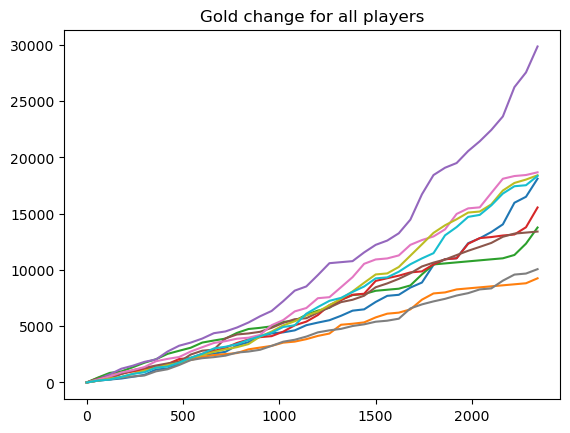

In [25]:
# Example: time series for each player's gold.
%matplotlib inline

from matplotlib import pyplot as plt
for player in match['players']:
    plt.plot(player['times'], player['gold_t'])

plt.title('Gold change for all players')

Function to read files with game descriptions

The following function `read_matches(filename)`, can be used to read raw data on Dota 2 games.

We recommend to install two Python packages: `ujson` and `tqdm`, it'll make the execution faster and

In [26]:
import os

try:
    import ujson as json
except ModuleNotFoundError:
    import json
    print ('Please install ujson to read JSON oblects faster')

try:
    from tqdm import notebook
except ModuleNotFoundError:
    notebook.tqdm = lambda x: x
    print ('Please install tqdm to track progress with Python loops')

def read_matches(matches_file):

    MATCHES_COUNT = {
        'test_matches.jsonl': 10000,
        'train_matches.jsonl': 39675,
    }
    _, filename = os.path.split(matches_file)
    total_matches = MATCHES_COUNT.get(filename)

    with open(matches_file) as fin:
        for line in notebook.tqdm(fin, total=total_matches):
            yield json.loads(line)

Reading data in a loop

Reading data on all games might take some 2-3 minutes. Thus you'd better stick to the following approach:

1. Read a small amount (10-100) of games

2. Write code to extract features from these JSON objects

3. Make sure the code works fine

4. Run the code with all available data

5. Save results to a pickle file so that you don't need to run all computations from scratch next time

In [27]:
for match in read_matches(os.path.join(PATH_TO_DATA, 'train_matches.jsonl')):
    match_id_hash = match['match_id_hash']
    game_time = match['game_time']

    # processing each game

    for player in match['players']:
        pass  # processing each player

  0%|          | 0/39675 [00:00<?, ?it/s]

## Feature engineering

In [28]:
def add_new_features(df_features, matches_file):

    # Process raw data and add new features
    for match in read_matches(matches_file):
        match_id_hash = match['match_id_hash']

        # Counting ruined towers for both teams
        radiant_tower_kills = 0
        dire_tower_kills = 0
        for objective in match['objectives']:
            if objective['type'] == 'CHAT_MESSAGE_TOWER_KILL':
                if objective['team'] == 2:
                    radiant_tower_kills += 1
                if objective['team'] == 3:
                    dire_tower_kills += 1

        # Write new features
        df_features.loc[match_id_hash, 'radiant_tower_kills'] = radiant_tower_kills
        df_features.loc[match_id_hash, 'dire_tower_kills'] = dire_tower_kills
        df_features.loc[match_id_hash, 'diff_tower_kills'] = radiant_tower_kills - dire_tower_kills

        # ... here you can add more features ...

# copy the dataframe with features
df_train_features_extended = df_train_features.copy()

# add new features
add_new_features(df_train_features_extended,
                 os.path.join(PATH_TO_DATA,
                              'train_matches.jsonl'))

  0%|          | 0/39675 [00:00<?, ?it/s]

In [29]:
# We see new features added to the right.
df_train_features_extended.head()

,game_time,game_mode,lobby_type,objectives_len,chat_len,r1_hero_id,r1_kills,r1_deaths,r1_assists,r1_denies,...,d5_rune_pickups,d5_firstblood_claimed,d5_teamfight_participation,d5_towers_killed,d5_roshans_killed,d5_obs_placed,d5_sen_placed,radiant_tower_kills,dire_tower_kills,diff_tower_kills
match_id_hash,,,,,,,,,,,,,,,,,,,,,
a400b8f29dece5f4d266f49f1ae2e98a,155,22,7,1,11,11,0,0,0,0,...,0,0,0.00,0,0,0,0,0.0,0.0,0.0
b9c57c450ce74a2af79c9ce96fac144d,658,4,0,3,10,15,7,2,0,7,...,0,0,0.00,0,0,0,0,2.0,0.0,2.0
6db558535151ea18ca70a6892197db41,21,23,0,0,0,101,0,0,0,0,...,0,0,0.00,0,0,0,0,0.0,0.0,0.0
46a0ddce8f7ed2a8d9bd5edcbb925682,576,22,7,1,4,14,1,0,3,1,...,3,0,0.00,0,0,2,0,0.0,0.0,0.0
b1b35ff97723d9b7ade1c9c3cf48f770,453,22,7,1,3,42,0,1,1,0,...,2,0,0.25,0,0,0,0,0.0,0.0,0.0


Evaluating new features

Let's run cross-validation with a fixed model but with two different datasets:

1. with features built by organizers (base)

2. with new features that we've added (extended)

In [30]:
%%time

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, n_jobs=4, random_state=17)

cv_scores_base = cross_val_score(model, X, y, cv=cv, scoring='roc_auc', n_jobs=-1)
cv_scores_extended = cross_val_score(model, df_train_features_extended.values, y,
                                     cv=cv, scoring='roc_auc', n_jobs=-1)

CPU times: user 319 ms, sys: 177 ms, total: 496 ms
Wall time: 43.5 s


In [31]:
print('Base features: mean={} scores={}'.format(cv_scores_base.mean(),
                                                cv_scores_base))
print('Extended features: mean={} scores={}'.format(cv_scores_extended.mean(),
                                                    cv_scores_extended))

Base features: mean=0.7795738699757455 scores=[0.77723183 0.78656801 0.78004904 0.77732062 0.77669984]
Extended features: mean=0.7862340339233831 scores=[0.78570687 0.79044313 0.78708931 0.78227352 0.78565735]


In [32]:
cv_scores_extended > cv_scores_base

array([ True,  True,  True,  True,  True])

As we see, RandomForestClassifier shows better cross-validation results in case of the extended dataset. Looks reasonable, that's what we build features for.

In [33]:
%%time

"""New submission"""

# Build the same features for the test set
df_test_features_extended = df_test_features.copy()
add_new_features(df_test_features_extended,
                 os.path.join(PATH_TO_DATA, 'test_matches.jsonl'))

  0%|          | 0/10000 [00:00<?, ?it/s]

CPU times: user 14.3 s, sys: 527 ms, total: 14.8 s
Wall time: 14.4 s


In [34]:
model = RandomForestClassifier(n_estimators=100, n_jobs=4, random_state=17)
model.fit(X, y)
df_submission_base = pd.DataFrame(
    {'radiant_win_prob': model.predict_proba(df_test_features.values)[:, 1]},
    index=df_test_features.index,
)
df_submission_base.to_csv('submission_base_rf.csv')

model_extended = RandomForestClassifier(n_estimators=100, n_jobs=4, random_state=17)
model_extended.fit(df_train_features_extended.values, y)
df_submission_extended = pd.DataFrame(
    {'radiant_win_prob': model_extended.predict_proba(df_test_features_extended.values)[:, 1]}, 
    index=df_test_features.index,
)
df_submission_extended.to_csv('submission_extended_rf.csv')

# this one will be used as a final submission in this kernel
!cp submission_extended_rf.csv submission.csv

## How to build initial features from scratch

Now we diclose the code that we used to build initial features `train_features.csv` and `test_features.csv`. You can modify the following code to add more features.

In a nutshell:

1. the `extract_features_csv(match)` function extracts features from game descriptions and writes them into a dictionary

2. the `extract_targets_csv(match, targets)` function extracts the target variable `radiant_win`

3. iterating through the file with raw data, we collect all features

4. with `pandas.DataFrame.from_records()` we create dataframes with new features

In [35]:
import collections

MATCH_FEATURES = [
    ('game_time', lambda m: m['game_time']),
    ('game_mode', lambda m: m['game_mode']),
    ('lobby_type', lambda m: m['lobby_type']),
    ('objectives_len', lambda m: len(m['objectives'])),
    ('chat_len', lambda m: len(m['chat'])),
]

PLAYER_FIELDS = [
    'hero_id',

    'kills',
    'deaths',
    'assists',
    'denies',

    'gold',
    'lh',
    'xp',
    'health',
    'max_health',
    'max_mana',
    'level',

    'x',
    'y',

    'stuns',
    'creeps_stacked',
    'camps_stacked',
    'rune_pickups',
    'firstblood_claimed',
    'teamfight_participation',
    'towers_killed',
    'roshans_killed',
    'obs_placed',
    'sen_placed',
]

def extract_features_csv(match):
    row = [
        ('match_id_hash', match['match_id_hash']),
    ]

    for field, f in MATCH_FEATURES:
        row.append((field, f(match)))

    for slot, player in enumerate(match['players']):
        if slot < 5:
            player_name = 'r%d' % (slot + 1)
        else:
            player_name = 'd%d' % (slot - 4)

        for field in PLAYER_FIELDS:
            column_name = '%s_%s' % (player_name, field)
            row.append((column_name, player[field]))

    return collections.OrderedDict(row)

def extract_targets_csv(match, targets):
    return collections.OrderedDict([('match_id_hash', match['match_id_hash'])] + [
        (field, targets[field])
        for field in ['game_time', 'radiant_win', 'duration', 'time_remaining', 'next_roshan_team']
    ])

In [36]:
%%time

df_new_features = []
df_new_targets = []

for match in read_matches(os.path.join(PATH_TO_DATA, 'train_matches.jsonl')):
    match_id_hash = match['match_id_hash']
    features = extract_features_csv(match)
    targets = extract_targets_csv(match, match['targets'])

    df_new_features.append(features)
    df_new_targets.append(targets)

  0%|          | 0/39675 [00:00<?, ?it/s]

CPU times: user 42.1 s, sys: 21.3 s, total: 1min 3s
Wall time: 1min 3s


In [37]:
df_new_features = pd.DataFrame.from_records(df_new_features).set_index('match_id_hash')
df_new_targets = pd.DataFrame.from_records(df_new_targets).set_index('match_id_hash')

df_new_features.head()

,game_time,game_mode,lobby_type,objectives_len,chat_len,r1_hero_id,r1_kills,r1_deaths,r1_assists,r1_denies,...,d5_stuns,d5_creeps_stacked,d5_camps_stacked,d5_rune_pickups,d5_firstblood_claimed,d5_teamfight_participation,d5_towers_killed,d5_roshans_killed,d5_obs_placed,d5_sen_placed
match_id_hash,,,,,,,,,,,,,,,,,,,,,
a400b8f29dece5f4d266f49f1ae2e98a,155,22,7,1,11,11,0,0,0,0,...,0.000,0,0,0,0,0.00,0,0,0,0
b9c57c450ce74a2af79c9ce96fac144d,658,4,0,3,10,15,7,2,0,7,...,0.000,0,0,0,0,0.00,0,0,0,0
6db558535151ea18ca70a6892197db41,21,23,0,0,0,101,0,0,0,0,...,0.000,0,0,0,0,0.00,0,0,0,0
46a0ddce8f7ed2a8d9bd5edcbb925682,576,22,7,1,4,14,1,0,3,1,...,8.665,3,1,3,0,0.00,0,0,2,0
b1b35ff97723d9b7ade1c9c3cf48f770,453,22,7,1,3,42,0,1,1,0,...,0.000,2,1,2,0,0.25,0,0,0,0


## Go on!

- Discuss new ideas in Slack

- Create new features

- Try new models and ensembles

- Submit predictions

- Go and win!